In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = /content/'mountains_vs_beaches_preferences.csv'
df = pd.read_csv(dataset)

In [3]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [4]:
missing_data = df.isnull().sum()
print(missing_data)

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64


In [5]:
# Group "Summer" and "Other Seasons"
df['Season_Group'] = df['Favorite_Season'].apply(lambda x: 'Summer' if x == 'summer' else 'Other Seasons')
# Verify the grouping
season_group_counts = df['Season_Group'].value_counts()
print(season_group_counts)

Season_Group
Other Seasons    39141
Summer           13303
Name: count, dtype: int64


In [6]:
# Map the Preference column for better interpretation (assuming 0: Mountains, 1: Beaches)
# Map the Preference column to meaningful labels
df['Preference_Label'] = df['Preference'].map({0: 'Mountains', 1: 'Beaches'})
print(df['Preference_Label'].value_counts())
# Cross-tabulation of Favorite_Season vs Preference
season_preference_ct = pd.crosstab(df['Season_Group'], df['Preference_Label'])
print(season_preference_ct)

Preference_Label
Mountains    39296
Beaches      13148
Name: count, dtype: int64
Preference_Label  Beaches  Mountains
Season_Group                        
Other Seasons        9848      29293
Summer               3300      10003


In [7]:
# Normalize the cross-tabulation by row to calculate proportions
season_preference_ratio = season_preference_ct.div(season_preference_ct.sum(axis=1), axis=0)

season_preference_ct.sum(axis=1) computes the total count for each row (i.e., the total preferences within each season group):

For Summer: 3300 (Beaches) + 10003 (Mountains) = 13303

For Other Seasons: 9848 (Beaches) + 29293 (Mountains) = 39141

The .div(..., axis=0) divides each element in season_preference_ct by the corresponding row total. Since axis=0 specifies rows, the division happens row-wise.

For example:

# For Summer:

**Proportion of Beaches:**

3300/
13303
≈
0.248


**Proportion of Mountains:**

10003/
13303
≈
0.752

# For Other Seasons:

**Proportion of Beaches:**

39141/
9848
​
 ≈0.251

**Proportion of Mountains:**

39141/
29293
​
 ≈0.749

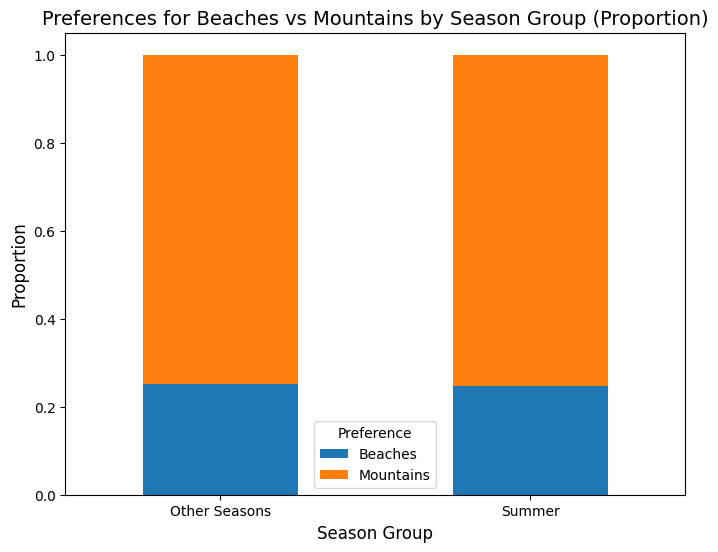

In [8]:
# Plot the normalized data
season_preference_ratio.plot(kind='bar', figsize=(8, 6), stacked=True)

# Customize the plot
plt.title('Preferences for Beaches vs Mountains by Season Group (Proportion)', fontsize=14)
plt.xlabel('Season Group', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Preference', fontsize=10)
plt.show()



After normalization, we eliminate the influence of the total group size, allowing us to directly compare proportions and better identify genuine preference differences.

If we use absolute counts, groups with larger sizes will dominate the analysis. Normalization brings all groups to the same scale, enabling a fairer comparison across them.

#Perform statistical analysis:

A chi-square test is used to determine whether there is a significant association
between two categorical variables: Season Group (Summer vs. Other Seasons)
and Vacation Preference (Beaches vs. Mountains).

**Null Hypothesis** (
H
0
​
 ):
There is no association between the season group (Summer vs. Other Seasons) and vacation preferences (Beaches vs. Mountains). This means the two variables are independent.

**Alternative Hypothesis** (
H
1
​
 ):
There is an association between the season group (Summer vs. Other Seasons) and vacation preferences (Beaches vs. Mountains). This means the two variables are dependent.
- `season_preference_ct` is the cross-tabulation of observed counts.
- `chi2_contingency` computes:
- Chi-square statistic (`chi2`): measures the divergence of observed data
from what is expected under the null hypothesis (independence).
- p-value (`p`): determines statistical significance.
- Degrees of Freedom (`dof`): number of independent values in the data.
- Expected frequencies (`expected`): theoretical counts assuming independence.


In [9]:
from scipy.stats import chi2_contingency

# Perform a chi-square test on the original cross-tabulation (counts)
chi2, p, dof, expected = chi2_contingency(season_preference_ct)

# Output the results of the chi-square test
statistical_analysis_results = {
    "Chi-square Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}

print(statistical_analysis_results)

# Set significance level
alpha = 0.05
print("p-value is " + str(p))
if p <= alpha:
    print("Dependent (reject H0): There is a significant association between Season Group and Preference.")
else:
    print("Independent (H0 holds true): There is no significant association between Season Group and Preference.")




{'Chi-square Statistic': 0.6431907153672198, 'p-value': 0.42255774916656974, 'Degrees of Freedom': 1, 'Expected Frequencies': array([[ 9812.86454122, 29328.13545878],
       [ 3335.13545878,  9967.86454122]])}
p-value is 0.42255774916656974
Independent (H0 holds true): There is no significant association between Season Group and Preference.


The p-value suggests that there is no statistically significant association between the favorite season and the preference for beaches or mountains. This implies that people's preferences for beaches or mountains are not strongly influenced by their favorite season, including summer.




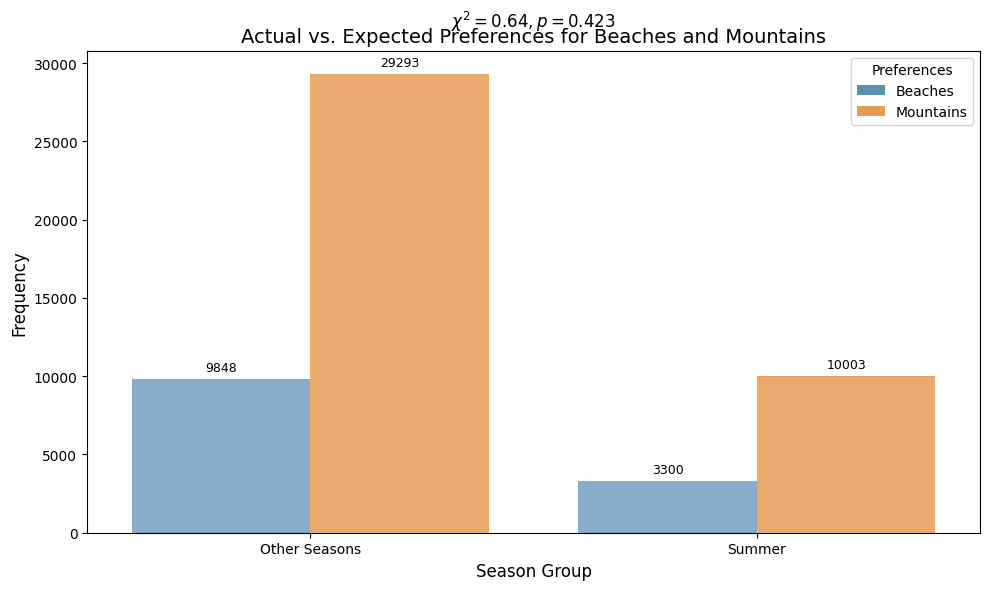

'/content/fixed_preference_plot.png'

In [18]:
# Ensure expected_df has meaningful column names and indices
expected_df = pd.DataFrame(expected, columns=season_preference_ct.columns, index=season_preference_ct.index)

# Visualize actual vs expected frequencies
fig, ax = plt.subplots(figsize=(10, 6))

# Actual frequencies
actual_colors = ['#1f77b4', '#ff7f0e']  # Blue and orange for actual
sns.barplot(data=season_preference_ct.reset_index().melt(id_vars='Season_Group'),
            x='Season_Group', y='value', hue='Preference_Label', palette=actual_colors, ax=ax, alpha=0.8)

# Expected frequencies
expected_colors = ['#aec7e8', '#ffbb78']  # Light blue and light orange for expected
sns.barplot(data=expected_df.reset_index().melt(id_vars='Season_Group'),
            x='Season_Group', y='value', hue='Preference_Label', palette=expected_colors, ax=ax, alpha=0.5)

# Adjust the legend to distinguish actual vs expected
handles, labels = ax.get_legend_handles_labels()
legend_labels = ["Beaches", "Mountains"]
ax.legend(handles=handles[:2] + handles[2:], labels=legend_labels, title="Preferences", loc='upper right')

# Annotate bars with values
for i, bar in enumerate(ax.patches[:len(season_preference_ct.values.flatten())]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 500,
            f"{int(bar.get_height())}", ha='center', fontsize=9)

# Add chi-square test result to the plot
ax.text(0.5, max(season_preference_ct.values.flatten()) + 3000,
        f"$\\chi^2 = {chi2:.2f}, p = {p:.3f}$", ha='center', fontsize=12)

# Add titles and labels
plt.title("Actual vs. Expected Preferences for Beaches and Mountains", fontsize=14)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Season Group", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save and display the plot
fixed_plot_path = "/content/fixed_preference_plot.png"
plt.savefig(fixed_plot_path)
plt.show()

fixed_plot_path



# Takeaways:
- The analysis shows no strong evidence to suggest that people who like summer
prefer beaches over mountains more than those who like other seasons.
- Normalizing group sizes and using statistical tests ensures that the analysis
is fair and interpretable, even for groups of differing sizes.
